 Erstellen Sie eine Python-Funktion, welche die Daten aus der Datei einliest (verwenden Sie
 dazu die Numpy-Funktion genfromtxt()), von den Daten die ersten 1000 Werte überspringt
 und aus den nächsten Werten (nehmen Sie eine sinnvolle Anzahl von Messungen) den
 Mittelwert und die Standardabweichung berechnet (der Einschwingvorgang wird dadurch
 ignoriert). Vergleichen Sie die Ergebnisse mit den Werten aus Ihrer gemessenen Tabelle.
 Stellen Sie die gefundene Übertragungsfunktion bzw. Kennlinie im Notebook graphisch mit
 Python bzw. Matplotlib dar.

In [6]:
import os

import numpy as np
from matplotlib import pyplot as plt

# get current working directory
path = os.getenv('DATA_PATH')
if not path:
    raise ValueError("DATA_PATH environment variable is not set")

converters = {i: lambda s: float(s.decode().replace(',', '.')) for i in range(2)}

mean_list = []  # list to store the mean of the data from each file
std_list = []  # list to store the standard deviation of the data from each file
for i in range(10, 71, 3):
    # Replace the German decimal comma with a dot and remove separators
    csv_data = np.genfromtxt(f"{path}\\V1_{i}.csv", delimiter=";", skip_header=1000, skip_footer=1, dtype=float,
                             converters=converters)

    # Write only voltage in array
    voltage_data = csv_data[:, 1]

    # get the mean of the data
    mean = np.mean(voltage_data, axis=0)
    print(f"{i} {mean}")
    # get the standard deviation of the data
    std = np.std(voltage_data, axis=0, ddof=1)
    # print(f"{i} {std}")
    mean_list.append(mean)
    std_list.append(std)

10 1.348606293778899
13 1.188338332240437
16 1.0593454600861705
19 0.9422708880128206
22 0.8682159075662046
25 0.8056663341288358
28 0.7491368855590583
31 0.6904930504592267
34 0.6511101496920977
37 0.6298625915531737
40 0.5952422504529212
43 0.5538551747078603
46 0.5353349117349725
49 0.516292314482976
52 0.4767991058984868
55 0.4582667302280369
58 0.4396033265079865
61 0.43869589409205534
64 0.41796839935477076
67 0.41720390158575016
70 0.3973853027448507


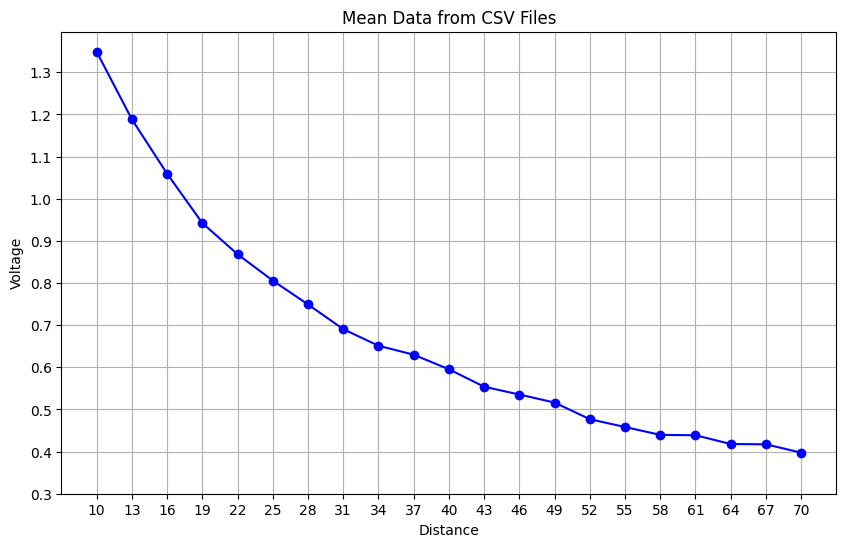

In [7]:
# plot the mean data with matplotlib
# Create a plot
distance = np.array(range(10, 71, 3))

plt.figure(figsize=(10, 6))
plt.plot(distance, mean_list, marker='o', linestyle='-', color='b')
plt.title('Mean Data from CSV Files')
plt.xlabel('Distance')
plt.ylabel('Voltage')
plt.xticks(distance)  # Set x-ticks to match column indices
plt.yticks(np.arange(0.3, 1.4, 0.1))  # Set y-ticks
plt.grid(True)
plt.show()

 2. Modellierung der Kennlinie durch lineare Regression

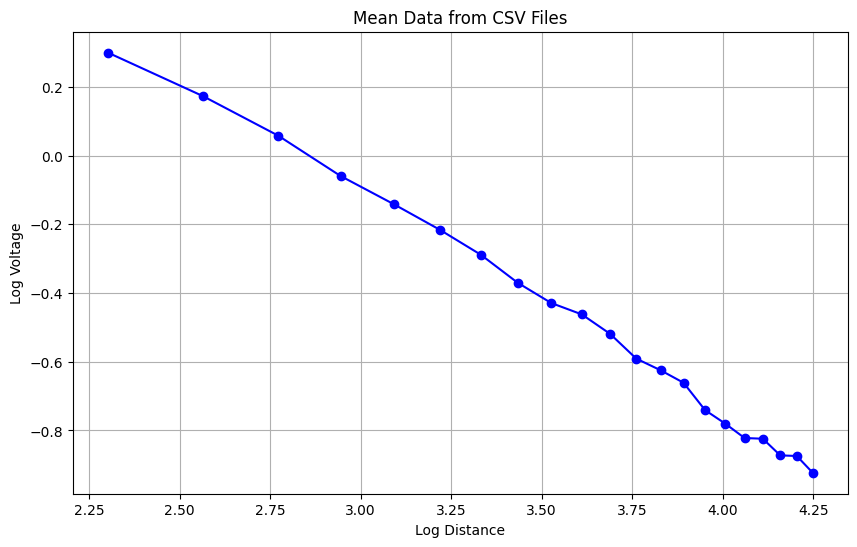

In [10]:
distance = np.array(range(10, 71, 3))

log_distance = np.log(distance)
log_mean = np.log(mean_list)
# plot the log data with matplotlib

plt.figure(figsize=(10, 6))
plt.plot(log_distance, log_mean, marker='o', linestyle='-', color='b')
plt.title('Mean Data from CSV Files')
plt.xlabel('Log Distance')
plt.ylabel('Log Voltage')
plt.grid(True)
plt.show()
    

 3. Berechnen Sie mithilfe der linearen Regression, wie in der Vorlesung behandelt, die
 Ausgleichsgerade in Python. Eliminieren Sie ggf. Werte für sehr große Entfernungen,
 für die der lineare Zusammenhang nicht mehr gilt.